In [ ]:
#DATA PREPROCESSING BLOCK

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("customer_churn_data.csv")
# Added EDA info
print("Columns in Dataset:\n", df.columns.tolist())
print("\nChurn Value Counts:\n", df['Churn'].value_counts())


# Select 2 features
X = df[['tenure', 'MonthlyCharges']].dropna()
y = LabelEncoder().fit_transform(df.loc[X.index, 'Churn'])


# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0], "\n")

Columns in Dataset:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Churn Value Counts:
 Churn
No     2982
Yes    2898
Name: count, dtype: int64
Training data size: 4704
Testing data size: 1176 



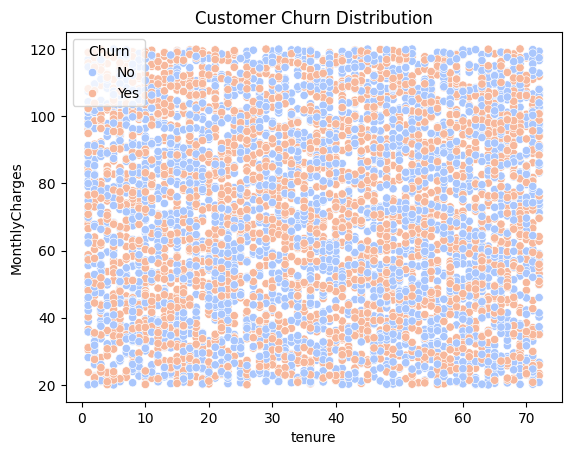

In [ ]:
#EDA BLOCK

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.show()


In [ ]:
#MODEL TRAINING BLOCK

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Train KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")


Accuracy: 48.72 %


Accuracy: 48.72 %


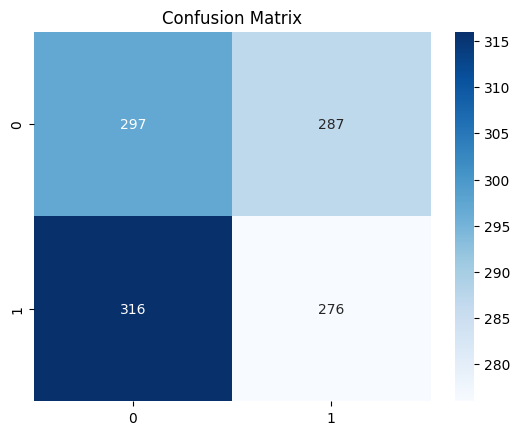

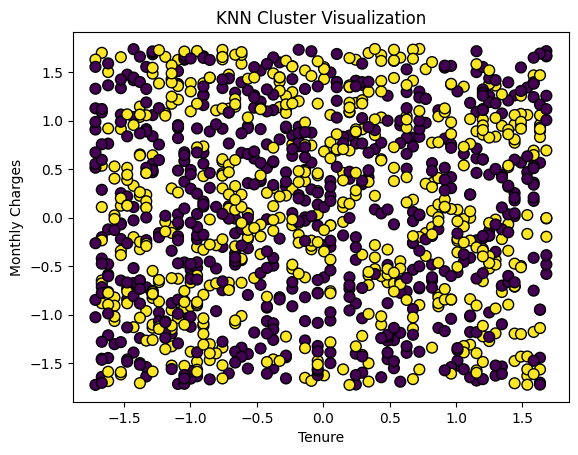

In [ ]:
#RESULT BLOCK

print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='viridis', s=60, edgecolors='k')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('KNN Cluster Visualization')
plt.show()